In [1]:
import pandas as pd
import numpy as np
import math
import operator
from collections import Counter
from matplotlib import pyplot as plt

from sklearn.metrics import accuracy_score  
from sklearn.metrics import confusion_matrix

In [2]:
df1 = pd.read_excel('DATASET_1.xlsx')

In [3]:
df1

,ID,Current Place,Latitude,Longitude,Place of interest,Latitude.1,Longitude.1,Food you like most,Leisure time activity,Future plan,Typically your days are started at:
0,151340976,Goran,23.750270,90.434130,Cox's Bazar,21.411270,91.995891,Biriyani,Movies,Software Engineer,LR
1,151340977,Banasree,22.513531,88.301537,Sea Beach,NaN,NaN,Kachchi,Sports,BCS/Business,LR
2,151340978,Azimpur,23.727040,90.384689,Kaptai Lake,22.755208,92.277031,kacchi biryani,Series,Higher Study in North America,ER
3,151340980,Niketon,23.707310,90.415480,home,23.707310,90.415480,any,"movies,music",software Engineer,LR
4,151340981,Shaymoli,22.301411,70.822357,home,22.301411,70.822357,sea food,music,businessman,LR
5,151340982,Bangshal,-32.348610,151.924576,Cox's Bazar,21.411270,91.995891,Burger,Series,Entrepreneur,LR
6,151340983,Dania,23.701443,90.442194,Bandorban,21.479600,92.559400,Biriyani,movies,Network Engineer,LR
7,151340984,Jurain,23.697285,90.431817,Home,23.697285,90.431817,Biriyani,NaN,CEO,LR
8,151340985,Lalbag,23.707310,90.415480,Home,23.707310,90.415480,Any,All,Higher Studies,LR
9,151340986,Rampura,23.761227,90.420769,Home,23.761227,90.420769,Biriyani,Movies,Software Engineer,LR


In [4]:
df2 = pd.read_excel('DATASET_2.xlsx')

In [5]:
df3 = pd.read_excel('DATASET_3.xlsx')
df4 = pd.read_excel('DATASET_4.xlsx')
df5 = pd.read_excel('DATASET_5.xlsx')
df6 = pd.read_excel('DATASET_6.xlsx')

In [6]:
df7=pd.concat([df1, df2,df3,df4, df5,df6])

In [7]:
df7

,ID,Current Place,Latitude,Longitude,Place of interest,Latitude.1,Longitude.1,Food you like most,Leisure time activity,Future plan,Typically your days are started at:
0,151340976,Goran,23.750270,90.4341,Cox's Bazar,21.4113,91.9959,Biriyani,Movies,Software Engineer,LR
1,151340977,Banasree,22.513531,88.3015,Sea Beach,NaN,NaN,Kachchi,Sports,BCS/Business,LR
2,151340978,Azimpur,23.727040,90.3847,Kaptai Lake,22.7552,92.277,kacchi biryani,Series,Higher Study in North America,ER
3,151340980,Niketon,23.707310,90.4155,home,23.7073,90.4155,any,"movies,music",software Engineer,LR
4,151340981,Shaymoli,22.301411,70.8224,home,22.3014,70.8224,sea food,music,businessman,LR
5,151340982,Bangshal,-32.348610,151.925,Cox's Bazar,21.4113,91.9959,Burger,Series,Entrepreneur,LR
6,151340983,Dania,23.701443,90.4422,Bandorban,21.4796,92.5594,Biriyani,movies,Network Engineer,LR
7,151340984,Jurain,23.697285,90.4318,Home,23.6973,90.4318,Biriyani,NaN,CEO,LR
8,151340985,Lalbag,23.707310,90.4155,Home,23.7073,90.4155,Any,All,Higher Studies,LR
9,151340986,Rampura,23.761227,90.4208,Home,23.7612,90.4208,Biriyani,Movies,Software Engineer,LR


In [8]:
df8 = pd.read_excel('EXTENDED_1.xlsx')

In [9]:
fdf=pd.merge(df7,df8,on="ID")

In [10]:
fdf

,ID,Current Place,Latitude,Longitude,Place of interest,Latitude.1,Longitude.1,Food you like most,Leisure time activity,Future plan,...,Are you eager to harm yourself to defend your beliefs?,"How frequently you visit a doctor within a year""",How many people do you follow on social media?,How much time you spend in university without academic curriculum(in hour)?,Are you rich in vocabulary?,"Class note taking tendency(High,Low,Medium)","Theory class attendance(h,l,m)","Theory class interest(h,l,m)","Lab interest(h,l,m)",Preference(class lectures cl or online tutorials)
0,151340976,Goran,23.750270,90.4341,Cox's Bazar,21.4113,91.9959,Biriyani,Movies,Software Engineer,...,No,often,500,1.5,No,Medium,m,Medium,High,Class lectures
1,151340977,Banasree,22.513531,88.3015,Sea Beach,NaN,NaN,Kachchi,Sports,BCS/Business,...,Maybe,2019-02-01 00:00:00,2019-05-03 00:00:00,1-2 hours,Yes,Medium,m,Medium,High,Online tutorials
2,151340980,Niketon,23.707310,90.4155,home,23.7073,90.4155,any,"movies,music",software Engineer,...,No,5 years ago last visitted,more than 100,1 hour,No,Medium,m,Medium,Medium,Online tutorials
3,151340981,Shaymoli,22.301411,70.8224,home,22.3014,70.8224,sea food,music,businessman,...,No,very rare,no one apart from friends,"0,rarely 1 hour",Yes,Low,medium,Medium,Low,Online tutorials
4,151340982,Bangshal,-32.348610,151.925,Cox's Bazar,21.4113,91.9959,Burger,Series,Entrepreneur,...,No,2,10,0,Maybe,Medium,h,High,Medium,Online tutorials
5,151340983,Dania,23.701443,90.4422,Bandorban,21.4796,92.5594,Biriyani,movies,Network Engineer,...,No,1,3,1,No,Low,m,Medium,High,Online tutorials
6,151340984,Jurain,23.697285,90.4318,Home,23.6973,90.4318,Biriyani,NaN,CEO,...,Maybe,4,50,6,Maybe,Medium,m,Medium,High,Online tutorials
7,151340985,Lalbag,23.707310,90.4155,Home,23.7073,90.4155,Any,All,Higher Studies,...,Maybe,once or twice a year,3,4,Yes,Low,l,Low,High,Online tutorials
8,151340986,Rampura,23.761227,90.4208,Home,23.7612,90.4208,Biriyani,Movies,Software Engineer,...,No,2,100,1 hour,No,Low,m,Low,High,Online tutorials
9,151340988,Rampura,23.761227,90.4208,Bandorban,21.4796,92.5594,Chicken,"movies, music",Software Engineer,...,No,3,100,0,No,Low,l,Low,High,Online tutorials


In [11]:
fdf.drop(fdf.columns.difference(['ID','Current Place','Latitude','Longitude','Food you like most','Expected food price of that favorite food','Restaurant location']), 1, inplace=True)

In [12]:
fdf

,ID,Current Place,Latitude,Longitude,Food you like most,Expected food price of that favorite food,Restaurant location
0,151340976,Goran,23.750270,90.4341,Biriyani,150,Khilgaon
1,151340977,Banasree,22.513531,88.3015,Kachchi,200,Dhanmondi
2,151340980,Niketon,23.707310,90.4155,any,200,dhanmondi
3,151340981,Shaymoli,22.301411,70.8224,sea food,70,"many outlets in dhaka,i go to dhanmondi"
4,151340982,Bangshal,-32.348610,151.925,Burger,1000,Dhanmondi
5,151340983,Dania,23.701443,90.4422,Biriyani,180,shantinagor
6,151340984,Jurain,23.697285,90.4318,Biriyani,250,Dhanmondi
7,151340985,Lalbag,23.707310,90.4155,Any,400,dhanmondi
8,151340986,Rampura,23.761227,90.4208,Biriyani,150,Aust
9,151340988,Rampura,23.761227,90.4208,Chicken,350,basundhara


In [13]:
new=fdf

In [14]:
new

,ID,Current Place,Latitude,Longitude,Food you like most,Expected food price of that favorite food,Restaurant location
0,151340976,Goran,23.750270,90.4341,Biriyani,150,Khilgaon
1,151340977,Banasree,22.513531,88.3015,Kachchi,200,Dhanmondi
2,151340980,Niketon,23.707310,90.4155,any,200,dhanmondi
3,151340981,Shaymoli,22.301411,70.8224,sea food,70,"many outlets in dhaka,i go to dhanmondi"
4,151340982,Bangshal,-32.348610,151.925,Burger,1000,Dhanmondi
5,151340983,Dania,23.701443,90.4422,Biriyani,180,shantinagor
6,151340984,Jurain,23.697285,90.4318,Biriyani,250,Dhanmondi
7,151340985,Lalbag,23.707310,90.4155,Any,400,dhanmondi
8,151340986,Rampura,23.761227,90.4208,Biriyani,150,Aust
9,151340988,Rampura,23.761227,90.4208,Chicken,350,basundhara


In [15]:
#new.to_csv('q1.csv')


In [16]:
fdf= pd.read_csv('q2.csv')
fdf = fdf.drop('Unnamed: 0', axis=1)

fdf.columns = ['id','u','v','w','x','y','z']

fdf.loc[fdf.z == 'Khilgaon', 'RL'] = 1
fdf.loc[fdf.z == 'Dhanmondi', 'RL'] = 2
fdf.loc[fdf.z == 'Shyamoli', 'RL'] = 3
fdf.loc[fdf.z == 'Mirpur', 'RL'] = 3
fdf.loc[fdf.z == 'Shantinagar', 'RL'] = 4
fdf.loc[fdf.z == 'BailyRoad', 'RL'] = 4
fdf.loc[fdf.z == 'Gulshan', 'RL'] = 5
fdf.loc[fdf.z == 'Banani', 'RL'] = 5

In [17]:
fdf.head()

,id,u,v,w,x,y,z,RL
0,151340976,Goran,23.750270,90.434130,Biriyani,150,Khilgaon,1.0
1,151340977,Banasree,22.513531,88.301537,Kacchi,200,Dhanmondi,2.0
2,151340980,Niketon,23.707310,90.415480,NaN,200,Dhanmondi,2.0
3,151340981,Shaymoli,22.301411,70.822357,Burger,70,Dhanmondi,2.0
4,151340982,Bangshal,-32.348610,151.924576,Burger,1000,Dhanmondi,2.0


In [18]:
fdf.loc[fdf.x == 'Biriyani', 'fc'] = 1
fdf.loc[fdf.x == 'Kacchi', 'fc'] = 1
fdf.loc[fdf.x == 'RegularFood', 'fc'] = 1
fdf.loc[fdf.x == 'khichuri', 'fc'] = 1


fdf.loc[fdf.x == 'Burger', 'fc'] = 2
fdf.loc[fdf.x == 'Pizza', 'fc'] = 2
fdf.loc[fdf.x == 'Pasta', 'fc'] = 2
fdf.loc[fdf.x == 'FastFood', 'fc'] = 2
fdf.loc[fdf.x == 'ChineseFood', 'fc'] = 2

fdf.loc[fdf.x == 'Chicken', 'fc'] = 3
fdf.loc[fdf.x == 'Egg', 'fc'] = 3
fdf.loc[fdf.x == 'Tea', 'fc'] = 3
fdf.loc[fdf.x == 'Hilsha', 'fc'] = 3
fdf.loc[fdf.x == 'Hilsa', 'fc'] = 3
fdf.loc[fdf.x == 'Mutton', 'fc'] = 3
fdf.loc[fdf.x == 'Beef', 'fc'] = 3

fdf.loc[fdf.x == 'Waffle', 'fc'] = 4
fdf.loc[fdf.x == 'Cake', 'fc'] = 4
fdf.loc[fdf.x == 'Cashewnut', 'fc'] = 4


In [19]:
fdf.head()

,id,u,v,w,x,y,z,RL,fc
0,151340976,Goran,23.750270,90.434130,Biriyani,150,Khilgaon,1.0,1.0
1,151340977,Banasree,22.513531,88.301537,Kacchi,200,Dhanmondi,2.0,1.0
2,151340980,Niketon,23.707310,90.415480,NaN,200,Dhanmondi,2.0,NaN
3,151340981,Shaymoli,22.301411,70.822357,Burger,70,Dhanmondi,2.0,2.0
4,151340982,Bangshal,-32.348610,151.924576,Burger,1000,Dhanmondi,2.0,2.0


In [20]:
fdf.drop(fdf.columns.difference(['v','w','y','RL','fc']), 1, inplace=True)

In [21]:
fdf

,v,w,y,RL,fc
0,23.750270,90.434130,150,1.0,1.0
1,22.513531,88.301537,200,2.0,1.0
2,23.707310,90.415480,200,2.0,NaN
3,22.301411,70.822357,70,2.0,2.0
4,-32.348610,151.924576,1000,2.0,2.0
5,23.701443,90.442194,180,4.0,1.0
6,23.697285,90.431817,250,2.0,1.0
7,23.707310,90.415480,400,2.0,1.0
8,23.761227,90.420769,150,NaN,1.0
9,23.761227,90.420769,350,2.0,3.0


In [22]:
cT=['v','w','y','fc','RL']
fdf=fdf.reindex(columns=cT)

In [23]:
fdf

,v,w,y,fc,RL
0,23.750270,90.434130,150,1.0,1.0
1,22.513531,88.301537,200,1.0,2.0
2,23.707310,90.415480,200,NaN,2.0
3,22.301411,70.822357,70,2.0,2.0
4,-32.348610,151.924576,1000,2.0,2.0
5,23.701443,90.442194,180,1.0,4.0
6,23.697285,90.431817,250,1.0,2.0
7,23.707310,90.415480,400,1.0,2.0
8,23.761227,90.420769,150,1.0,NaN
9,23.761227,90.420769,350,3.0,2.0


In [24]:
fdf=fdf.fillna(0)

In [34]:
fdf[pd.to_numeric(fdf['v'],errors='coerce').notnull()]

,v,w,y,fc,RL
0,23.750270,90.434130,150,1.0,1.0
1,22.513531,88.301537,200,1.0,2.0
2,23.707310,90.415480,200,0.0,2.0
3,22.301411,70.822357,70,2.0,2.0
4,-32.348610,151.924576,1000,2.0,2.0
5,23.701443,90.442194,180,1.0,4.0
6,23.697285,90.431817,250,1.0,2.0
7,23.707310,90.415480,400,1.0,2.0
8,23.761227,90.420769,150,1.0,0.0
9,23.761227,90.420769,350,3.0,2.0


In [35]:
fdf[pd.to_numeric(fdf['w'],errors='coerce').notnull()]

,v,w,y,fc,RL
0,23.750270,90.434130,150,1.0,1.0
1,22.513531,88.301537,200,1.0,2.0
2,23.707310,90.415480,200,0.0,2.0
3,22.301411,70.822357,70,2.0,2.0
4,-32.348610,151.924576,1000,2.0,2.0
5,23.701443,90.442194,180,1.0,4.0
6,23.697285,90.431817,250,1.0,2.0
7,23.707310,90.415480,400,1.0,2.0
8,23.761227,90.420769,150,1.0,0.0
9,23.761227,90.420769,350,3.0,2.0


In [36]:
fdf[pd.to_numeric(fdf['y'],errors='coerce').notnull()]
fdf[pd.to_numeric(fdf['fc'],errors='coerce').notnull()]
fdf[pd.to_numeric(fdf['RL'],errors='coerce').notnull()]

,v,w,y,fc,RL
0,23.750270,90.434130,150,1.0,1.0
1,22.513531,88.301537,200,1.0,2.0
2,23.707310,90.415480,200,0.0,2.0
3,22.301411,70.822357,70,2.0,2.0
4,-32.348610,151.924576,1000,2.0,2.0
5,23.701443,90.442194,180,1.0,4.0
6,23.697285,90.431817,250,1.0,2.0
7,23.707310,90.415480,400,1.0,2.0
8,23.761227,90.420769,150,1.0,0.0
9,23.761227,90.420769,350,3.0,2.0


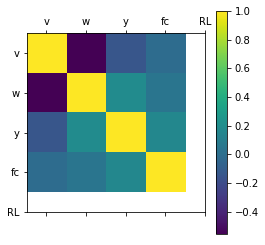

In [45]:
plt.matshow(fdf.corr())
plt.xticks(range(len(fdf.columns)), fdf.columns)
plt.yticks(range(len(fdf.columns)), fdf.columns)
plt.colorbar()
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


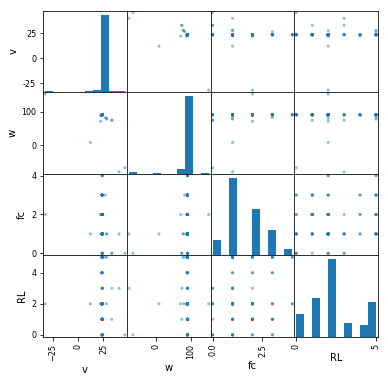

In [46]:
pd.scatter_matrix(fdf, figsize=(6, 6))
plt.show()

In [50]:
fdf.to_csv('question2.csv')

In [51]:
fdf = pd.read_csv('question2.csv')

In [52]:
fdf.head()

,Unnamed: 0,Unnamed: 0.1,v,w,y,fc,RL
0,0,0,23.750270,90.434130,150,1,1
1,1,1,22.513531,88.301537,200,1,2
2,2,2,23.707310,90.415480,200,0,2
3,3,3,22.301411,70.822357,70,2,2
4,4,4,-32.348610,151.924576,1000,2,2


In [53]:
X = fdf.iloc[:,2:6].values

In [54]:
y = fdf.iloc[:, 6].values

In [55]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [56]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [68]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=30)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [69]:
y_pred = classifier.predict(X_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[0 0 1 0 0 0]
 [0 0 5 0 0 1]
 [0 1 6 0 0 1]
 [0 1 2 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 0 0 0]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.00      0.00      0.00         6
          2       0.35      0.75      0.48         8
          3       0.00      0.00      0.00         3
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         0

avg / total       0.13      0.29      0.18        21



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [70]:
acc=classifier.score(X_train, y_train)

In [71]:
acc

0.4024390243902439

In [72]:
exampe_measures = np.array([22.78,77.86,200,1])
exampe_measures = exampe_measures.reshape(1,-1)
prediction=classifier.predict(exampe_measures)

In [73]:
prediction

array([2], dtype=int64)

In [74]:
def plot_conf_mat(lTrue, lPred, title):
    
    cm = confusion_matrix(lTrue.astype(int), lPred.astype(int))
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show() 

[[0 0 1 0 0 0]
 [0 0 5 0 0 1]
 [0 1 6 0 0 1]
 [0 1 2 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 0 0 0]]


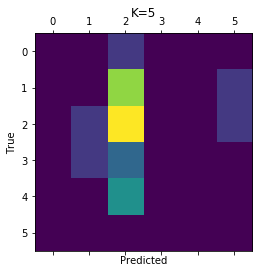

In [65]:
plot_conf_mat(y_test, y_pred, 'K=5')

In [75]:
error = []


for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

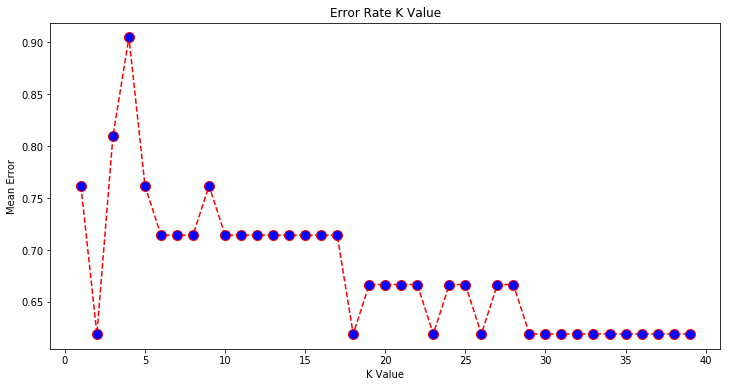

In [76]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

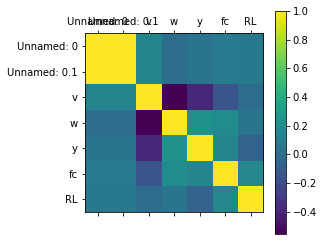

In [78]:
plt.matshow(fdf.corr())
plt.xticks(range(len(fdf.columns)), fdf.columns)
plt.yticks(range(len(fdf.columns)), fdf.columns)
plt.colorbar()
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


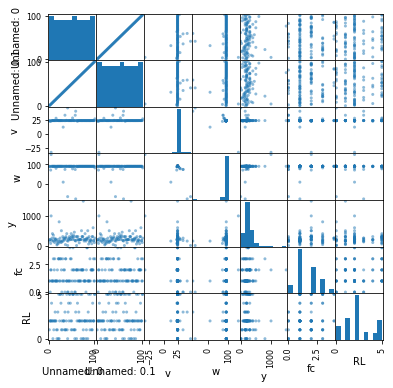

In [79]:
pd.scatter_matrix(fdf, figsize=(6, 6))
plt.show()